In [1]:
using Quantumoptics
using PyPlot

In [2]:
# Parameters
N_cutoff = 30

ωc = 0.1
ωa = 0.1
g = 2.
κ = 0.05
γ = 1.;

In [3]:
# Bases
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin;

In [4]:
# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = g*(at⊗sm + a⊗sp)
H = identity(b_fock)⊗Hatom + Hfield⊗identity(b_spin) + Hint;

# Jump operators
Jcavity = sqrt(κ)*a
Jspin = sqrt(γ)*sm
Jpump(η) = sqrt(η)*sp
J(η) = [identity(b_fock)⊗Jpump(η), identity(b_fock)⊗Jspin, Jcavity⊗identity(b_spin)];

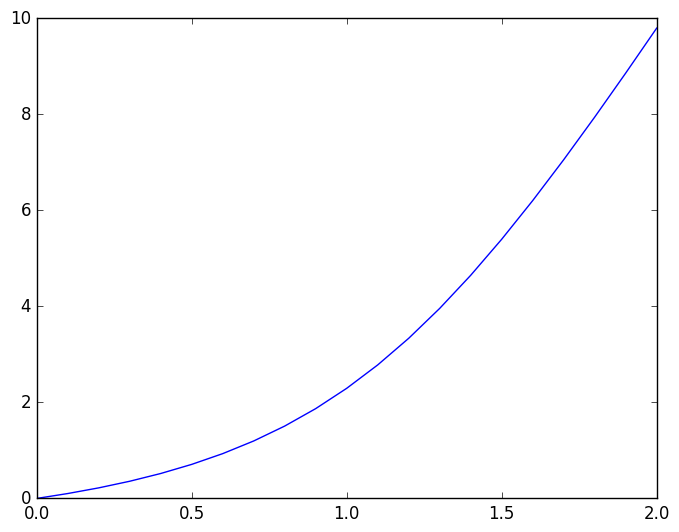

In [5]:
ηrange = [0:0.1:2;]
exp_n = Float64[]

for η=ηrange
    ρss = steadystate.eigenvector(H, J(η))
    push!(exp_n, abs(expect(n⊗identity(b_spin), ρss)))
end

plot(ηrange, exp_n);